# Knowledge Discovery in Databases I
# Exercise 5: Nearest Neighbor Classification, Information Gain

## Exercise 5-4 - Split Criteria, k-Nearest Neighbors (Solution)


In this tutorial, we want you to analyze different split criteria for Decision Trees as well as the k-Nearest Neighbors method.

# Decision Tree Split Criteria

Show that a decision tree built with the Gini impurity as split criterion does not always lead to the same tree obtained with the information gain as split criterion. What can you conclude in general?

To show that the statement holds, we create a dataset with one feature that has different optimal split values for the two criteria. We assume the following:
* data points are sorted in ascending order for the only attribute x
* samples are divided into four consecutive parts A,B,C,D with sample proportions a,b,c,d (a+b+c+d=1)
* all samples in A and C have label 0, all samples in B and D have label 1 
* to simplify the calculations in the following, let c = 2b = 2d

Consquently, the only two sensible split candidates are between A and B (split1) and between C and D (split2). Now, we calculate the information gain and the gini impurity (up to a constant) dependent on a.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def info_for_split1(a):
    # between A and B
    # the left side of the split is "pure", so we just have to consider the right side
    proportion = 1 - a
    p0 = 0.5
    p1 = (1-p0)
    
    return - proportion * (-p0*np.log(p0) - p1 * np.log(p1))

def gini_for_split1(a):
    # between A and B
    # the left side of the split is "pure", so we just have to consider the right side
    proportion = 1 - a
    p0 = 0.5
    p1 = (1-p0)
    return - proportion * (1  - p0**2 - p1**2)

def info_for_split2(a):
    # between C and D
    # the right side of the split is pure, so we only have to consider the left side
    proportion = a + 0.75 * (1-a)
    p0 = (a + 0.5 * (1-a)) / proportion
    p1 = (1-p0)
    
    return - proportion * (-p0*np.log(p0) - p1 * np.log(p1))

def gini_for_split2(a):
    # between C and D
    # the right side of the split is pure, so we only have to consider the left side
    proportion = a + 0.75 * (1-a)
    p0 = (a + 0.5 * (1-a)) / proportion
    p1 = (1-p0)
    
    return - proportion * (1  - p0**2 - p1**2)

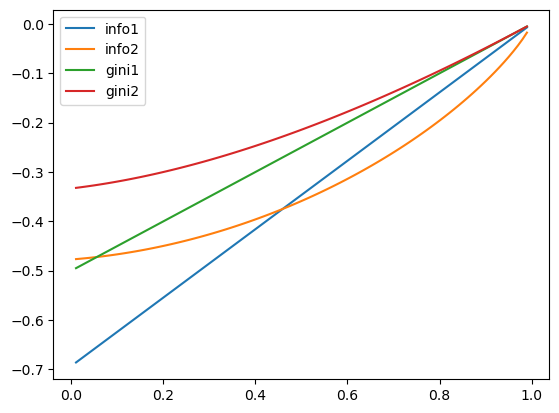

In [2]:
# now, we plot the two criteria for both splits for different values of a
a_range = np.linspace(0.01, .99, 100)


info1 = [info_for_split1(a) for a in a_range]
info2 = [info_for_split2(a) for a in a_range]
gini1 = [gini_for_split1(a) for a in a_range]
gini2 = [gini_for_split2(a) for a in a_range]

plt.plot(a_range, info1, label='info1')
plt.plot(a_range, info2, label='info2')
plt.plot(a_range, gini1, label='gini1')
plt.plot(a_range, gini2, label='gini2')
plt.legend()
plt.show()

So, if a is greater than ~0.5, information gain favors split1 whereas Gini impurity always favours split2.

Together with the visualization of Gini impurity and entropy below, we can conclude the following:
* small impurities are harder penalyzed by info (see steeper slopes at the borders in the plot below)
* large impurities are harder penalyzed by gini
* if the proportion of clean part at the beginning (i.e. a) is large enough, info gain prefers a larger impurity on the smaller proportion (split1) over a small impurity on a larger proportion (s2)
* in constrast, gini tries to avoid the high impurity arising with split1 at all times and prefers split2

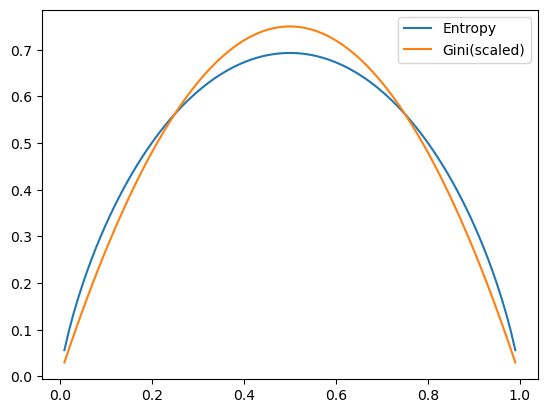

In [3]:
p = np.linspace(0.01, 0.99, 100)

plt.plot(p, (-p*np.log(p)-(1-p)*np.log(1-p)), label='Entropy')
plt.plot(p, p*(1-p)* 3, label='Gini(scaled)')
plt.legend()
plt.show()

# kNN

What is the training process for a kNN classifier?

kNN does not require any training in the usual sense. But, to guarantee a relatively fast inference, it is advisable to organize the training data in a way that is suitable for neighborhood queries, e.g. KD Tree, Ball Tree.

What are the asymptotic training and inference complexities dependent on N and D in "big O" notation if brute force is used for neighborhood queries?

Training: O(1) - no training

Inference: O(DN²)

What kind of decision boundaries can a kNN classifier fit to?

kNN allows to easily achieve 0 % training error on any dataset with distinct points, which means that it can "learn" any decision boundary. Just consider k=1. Then, any assignment of labels to training objects is automatically fitted to because for the prediction on a training object, only the very same object's label is considered.

What happens to training errors and decision boundaries for increasing values of k? Justify your answer with an experiment on synthetic data.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
n,d = 100, 2

X = np.random.uniform(size=(n,d))
y = np.random.randint(low=0, high=2, size=(n,))

k: 1, acc: 1.0


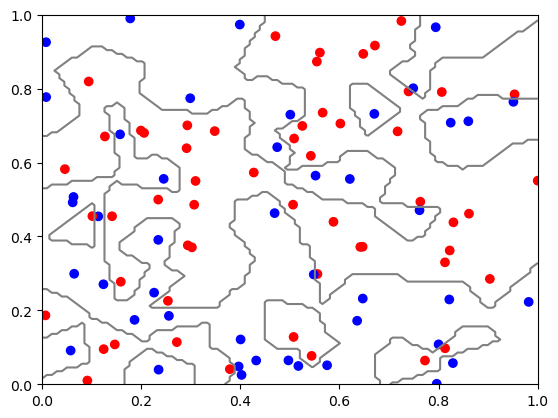

k: 2, acc: 0.73


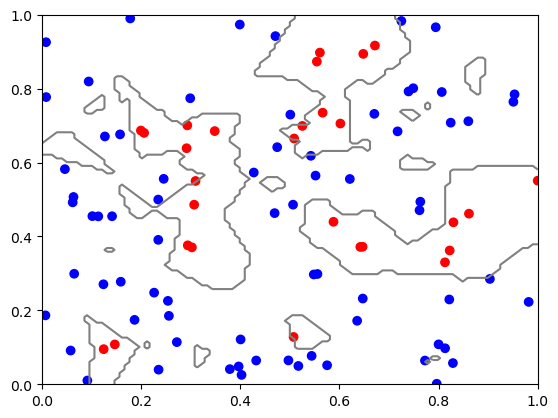

k: 4, acc: 0.64


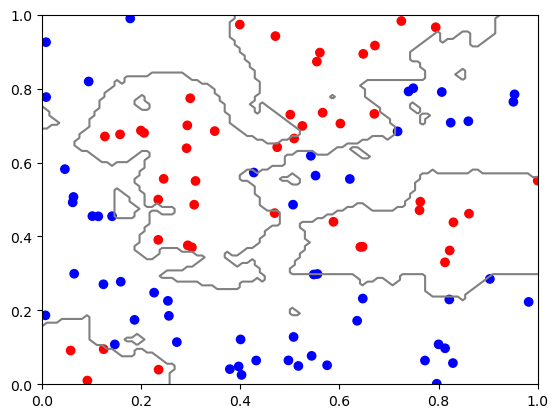

k: 8, acc: 0.62


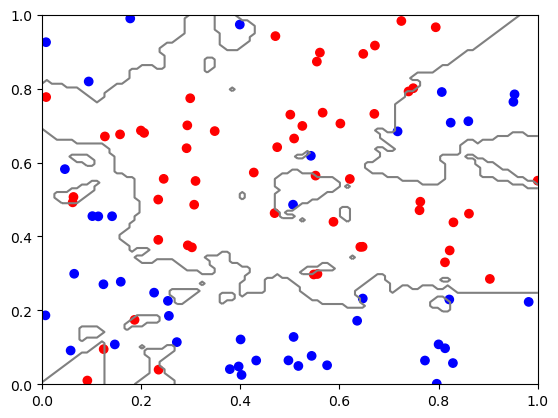

In [6]:
for k in [1,2,4,8]:
    knn = KNeighborsClassifier(k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    z = knn.predict(np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis=1))
    z = z.reshape(xx.shape)
    
    print('k: {}, acc: {}'.format(k, accuracy_score(y, y_pred)))
    
    plt.scatter(X[:,0],X[:,1],c=['r' if y_i==1 else 'b' for y_i in y_pred ])
    plt.contour(xx, yy, z, levels=[0.5], colors=['gray'])
    plt.show()

As we increase k, the decision boundary becomes smoother and less and less erratic. Simulatenously, the training error increases. Thus, we can tune the classifier's capacity with k. In practice, we have to find a sweet spot where k suffices to fit the data properly, but still is large enough to not overfit to the data.